<a href="https://colab.research.google.com/github/tszabad/deep_learning/blob/main/Copy_of_Day_04_Task_Handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High dimensional data is more frequent than one might first think, e.g., even a low resolution  grey scale image from the famous [MNIST datase](https://en.wikipedia.org/wiki/MNIST_database):

<a href="https://miro.medium.com/max/245/1*nlfLUgHUEj5vW7WVJpxY-g.png"><img src="https://drive.google.com/uc?export=view&id=1-XrK7beC0beocLB_NufEmKVsBbCRko88" width=250px></a>

(Image source: [Image Classification in 10 Minutes with MNIST Dataset](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d))

has 784 dimensions, as it contains intensity information for each of its $28\times 28 = 784$ pixels. Image processing is far from being the only area with high-dimensional data. For instance, the frequently used  "bag of words" representation of text documents in NLP uses a separate dimension for each word in the data set's vocabulary.


In this **practical session**, we try to:

* create a multi perceptron model,
* create an **LR** scheduler manually,
* find the maximum of **LR** with LRFinder function,
* and use the OneCycle **LR** model to get the best results.


# Task1
##Loading mnist hand written dataset

We try to classificate the mnist handwritten dataset with multi-layer perceptron.

In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#Load the dataset from keras API
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# Flatten the images
# You need to reshape the dataset from 28x28 2D array to 784 1D array. So the image_vector size equal the desired number of shape.
# Becuse the first layer of perceptron needs 1D array of nodes.
image_vector_size = 784
x_train = x_train.reshape(x_train.shape[0], image_vector_size) # with image_vector_size
x_test = x_test.reshape(x_test.shape[0], image_vector_size) # with image_vector_size

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
import pandas as pd

pd.unique(y_train)

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

#Task2
##Modeling

In this case, create the multiperceptron model, and set the initial hyperparameters, and we try to predict the handwritten numbers from 0 to 9.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [ ]:
# Hyperparameters
learning_rate = 0.1 # The learning rate
momentum = 0.0 # Momentum
#optimizer=SGD(learning_rate, momentum)
optimizer = "adam"

# create a model
def create_model():
      model = Sequential()
      # Input layer
      model.add(Dense(64, input_dim=784, activation="sigmoid")) #add activation function, size of hidden layers, and input_shape
      # Output layer
      model.add(Dropout(0.1))
      model.add(Dense(32, input_dim=784, activation="sigmoid"))
      model.add(Dropout(0.1))
      model.add(Dense(10, activation="softmax")) #add activation function, and output shape

      # Compile a model
      model.compile(loss='sparse_categorical_crossentropy' , optimizer=optimizer, metrics=['accuracy']) #use crossentropy loss function
      return model
model = create_model()
#fit the modelmodel.summary()

In [ ]:
#Fitting the model
#In this step we train our model with training dataset, and measure the loss, and accuracy on training and validation set too.

batch_size = 128
epoch = 20

results = model.fit(
    x_train, y_train,
    epochs= epoch,
    batch_size = batch_size,
    validation_data = (x_test, y_test), #add the validation set
    verbose = 1 # We need this, because Colab does not like if we print 1000 lines. So we disable keras status prints
)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.1843 - accuracy: 0.7090 - val_loss: 0.5731 - val_accuracy: 0.8809
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5281 - accuracy: 0.8642 - val_loss: 0.3861 - val_accuracy: 0.9034
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4237 - accuracy: 0.8793 - val_loss: 0.3165 - val_accuracy: 0.9129
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3938 - accuracy: 0.8846 - val_loss: 0.3058 - val_accuracy: 0.9104
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3710 - accuracy: 0.8907 - val_loss: 0.2849 - val_accuracy: 0.9175
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3552 - accuracy: 0.8941 - val_loss: 0.2776 - val_accuracy: 0.9173
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3448 - accuracy: 0.8957 - val_loss: 0.2666 - val_accuracy: 0.9195
Epoch 

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Maximum Loss : 1.1843

Minimum Loss : 0.2662

Loss difference : 0.9181


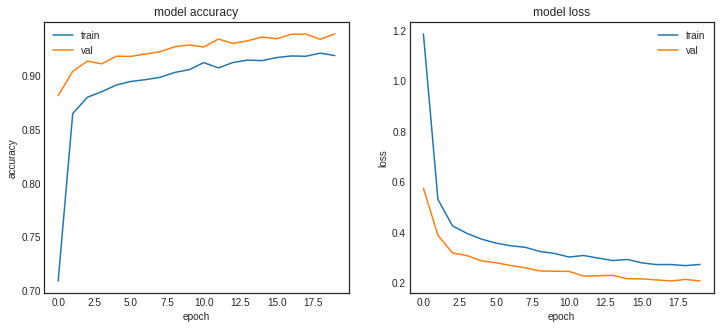

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='down right')

# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

#Task3
##LR Scheduler

In this case, try to create an LR Scheduler manually with scheduler function and LearningRateScheduler callback from keras API.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def scheduler(epoch, lr):
  #create statements:
  #if epoch less than 10 get back the initial lr, 
  #but if the number of epochs greater than 10 get back this equation: lr * tf.math.exp(-0.1)
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) #use the scheduler function for the LR scheduler

history = model.fit(
          x_train, y_train,
          epochs= 15,
          batch_size = 100,
          validation_data = (x_test, y_test), #use the validation set
          verbose = 1, # We need this, because Colab does not like if we print 1000 lines. So we disable keras status prints
          callbacks = callback #add the callback which is the LR Scheduler
          )

Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 0.2719 - accuracy: 0.9178 - val_loss: 0.2186 - val_accuracy: 0.9364
Epoch 2/15
600/600 [==============================] - 2s 4ms/step - loss: 0.2844 - accuracy: 0.9129 - val_loss: 0.2116 - val_accuracy: 0.9361
Epoch 3/15
600/600 [==============================] - 2s 4ms/step - loss: 0.2776 - accuracy: 0.9153 - val_loss: 0.2234 - val_accuracy: 0.9328
Epoch 4/15
600/600 [==============================] - 2s 4ms/step - loss: 0.2710 - accuracy: 0.9174 - val_loss: 0.2078 - val_accuracy: 0.9375
Epoch 5/15
600/600 [==============================] - 2s 4ms/step - loss: 0.2563 - accuracy: 0.9221 - val_loss: 0.1962 - val_accuracy: 0.9408
Epoch 6/15
600/600 [==============================] - 2s 4ms/step - loss: 0.2509 - accuracy: 0.9251 - val_loss: 0.1943 - val_accuracy: 0.9408
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.2552 - accuracy: 0.9229 - val_loss: 0.2004 - val_accuracy: 0.9412
Epoch 

In [ ]:
model.optimizer.lr.numpy()

0.06065308

In [ ]:
scheduled_lr = round(model.optimizer.lr.numpy(), 5) #save the model.optimizer.lr like numpy array and round it with 5 points and print it
print(scheduled_lr)

0.00061


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Maximum Loss : 0.2844

Minimum Loss : 0.2208

Loss difference : 0.0636


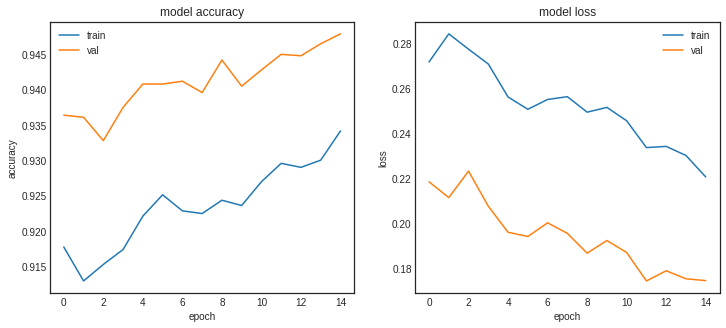

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='down right')

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

max_loss = np.max(history.history['loss'])
min_loss = np.min(history.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

#Task4
##LRFinder

There is a predefined learning rate finder function on [github](https://github.com/titu1994/keras-one-cycle/blob/master/clr.py) which we try. Please download the functions and try to use it with our hints.

In [ ]:
!wget "https://raw.githubusercontent.com/solalatus/IBS_GF_kepzes/main/Big_Data_and_ML/04Hyperparameters/clr.py?token=AHL2UDKITYK3K27TYW4F7XLBDIE2M" -O clr.py

In [ ]:
import os
import numpy as np
import warnings

from tensorflow.keras.callbacks import Callback
from keras import backend as K

In this step we import the LRFinder function, and try to use it. This function need start and end number of learning rate. After that this function iterate all from start to end lr step by step, and measure the accuracies and losses on training and validation set too. After that, the function get back the maximum of lr.

In [ ]:
from clr import LRFinder

num_samples = 600 #number of samples
batch_size = 236 #training batch size
minimum_lr = 1e-5 #starting lr eg.: 1e-5
maximum_lr = 30 #maximum lr eg.: 10

lr_callback = LRFinder(num_samples, batch_size,
                       minimum_lr, maximum_lr,
                       validation_data=(x_test, y_test),
                       lr_scale='exp')

In [ ]:
# Ensure that number of epochs = 1 when calling fit()
model.fit(x_train, y_train, epochs=1, batch_size=batch_size, callbacks=[lr_callback])

255/255 [==============================] - 19s 74ms/step - loss: 696622.5000 - accuracy: 0.1019


In [ ]:
lr_callback.history.keys()


dict_keys(['running_loss_', 'log_lrs', 'loss', 'accuracy'])

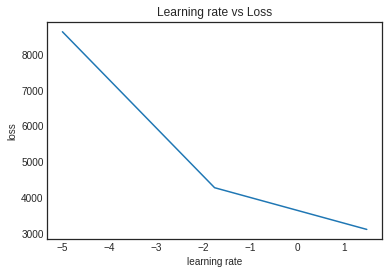

30
51961.523


In [ ]:
#plot the lr vs loss and find the best of LR
lr_callback.plot_schedule()
max_lr = lr_callback.final_lr # from history of model!
print(max_lr)
print(model.optimizer.lr.numpy())

#Task5
##One Cycle LR

After the LRFinding we try to use One Cycle LR which is a predefenied function in this case from [github](https://github.com/titu1994/keras-one-cycle/blob/master/clr.py). In this step we use the previous result (maximum lr) like maximum learning rate in OneCycleLR.

In [ ]:
from clr import OneCycleLR

In [ ]:
num_samples = 10000 # samples equal 10k
batch_size = 236 # like in the base model

lr_manager = OneCycleLR(num_samples=num_samples,
                        batch_size=batch_size,
                        max_lr=max_lr,
                        end_percentage=0.1,) #add 0.1 to end_percentage

In [ ]:
#use the lr_manager like callbacks
#add the train set again and fit the new model

model.fit( x_train, y_train, epochs=1, batch_size=batch_size, callbacks = [lr_manager])

255/255 [==============================] - 1s 6ms/step - loss: 33068.4805 - accuracy: 0.0942
 - lr: 0.04667 - momentum: 0.95 


LR Range :  0.046666667 10.0
Momentum Range :  0.85 0.95


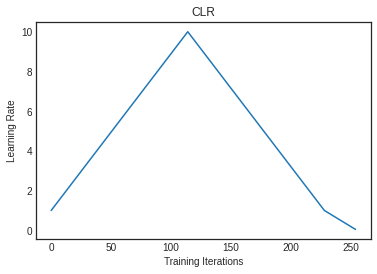

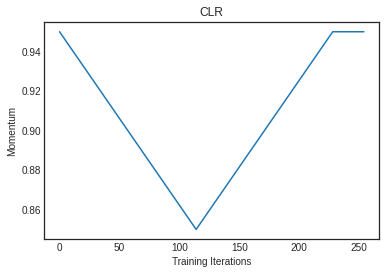

In [ ]:
#Plot the learning rate and momentum of one cycle LR

print("LR Range : ", min(lr_manager.history['lr']), max(lr_manager.history['lr']))
print("Momentum Range : ", min(lr_manager.history['momentum']), max(lr_manager.history['momentum']))


plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR")
plt.plot(lr_manager.history['lr']) # learning rate
plt.show()

plt.xlabel('Training Iterations')
plt.ylabel('Momentum')
plt.title("CLR")
plt.plot(lr_manager.history['momentum']) # momentum
plt.show()